# Сборный проект 1. Исследование компьютерных игр.

**Цели и задачи:** Провести анализ данных из открытых источников о продажах игр, оценках пользователей и экспертов, жанров и платформ. Определить основные факторы коммерческого успеха игры.  

**План выполнения работы:**  
- 1. Изучение общей информации о данных  
- 2. Подготовка данных  
    - 2.1 Преобразование данных в таблице  
    - 2.2 Расчёт дополнительных параметров  
- 3. Исследовательский анализ данных  
    - 3.1 Выбор актуальных игровых платформ и периода релиза игр  
    - 3.2 Исследование продаж по актуальным платформам  
    - 3.3 Влияние отзывов пользователей и критиков на продажи  
    - 3.4 Влияние жанра игры на продажи 
- 4. Портрет пользователя каждого региона  
- 5. Проверка гипотез  
    - 5.1 Удаление выбросов в оценках пользователей  
    - 5.2 Средние пользовательские рейтинги платформ Xbox One и PC  
    - 5.3 Средние пользовательские рейтинги жанров Action и Sports.  
- 6. Общий вывод  

**Описание данных:**  
Данные собраны в файле `games.csv`.     
- `Name` — название игры  
- `Platform` — платформа  
- `Year_of_Release` — год выпуска  
- `Genre` — жанр игры  
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)  
- `EU_sales` — продажи в Европе (миллионы проданных копий)  
- `JP_sales` — продажи в Японии (миллионы проданных копий)  
- `Other_sales` — продажи в других странах (миллионы проданных копий)  
- `Critic_Score` — оценка критиков (максимум 100)  
- `User_Score` — оценка пользователей (максимум 10)  
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.  

## Шаг 1. Изучение общей информации о данных

Подключаем библиотеки:
- `pandas` - для работы с таблицами  
- `numpy` - для преобразования векторных данных (np.ceil)
- `matplotlib`, `seaborn`, `plotly` - для визуализации данных
- `display` - для вывода табличных данных
- `stats` - для статистических исследований, проверки гипотез

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import display
import math
from scipy import stats as st

Загрузим данные из файла `games.csv`, выведем первые 10 строк таблицы для первого взгляда на данные.  
Также с помощью метода info() изучим структуру таблицы: типы данных, количество строк, столбцов, пропущенных данных.

In [92]:
# читаем данные из .csv файла с помощью метода read_csv()
games = pd.read_csv('games.csv')
# выведем первые 10 строк таблицы с помощью метода head()
display(games.head(10))
# с помощью метода info() изучим структуры таблицы: типы данных, количество строк, столбцов, пропущенных данных.
games.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [93]:
print('Количество дублированных строк:', sum(games.duplicated()))

Количество дублированных строк: 0


### Выводы

- Данные успешно загружены из файла. В таблице `games` 16715 записей. Дубликатов не обнаружено. Данные соответствуют описанию.
- Изучена общая информация таблиц.  
    - Тип данных в столбце `Year_of_Release` надо заменить на `int64`.   
    - Тип данных в столбце `User_Score` надо заменить на `float`.
- В некоторых столбцах до 50% пропущенных данных. Пропуски будут исследованы и обработаны далее.
- Необходимо дальнейшее исследование данных для поиска скрытых ошибок и выбросов.

## Шаг 2. Подготовка данных

### 2.1 Преобразование данных в таблице

**1) Замена названий столбцов**

Приведём названия столбцов к нижнему регистру.

In [94]:
# воспользуемся методом str.lower() для приведения названий столбцов к нижнему регистру
games.columns = games.columns.str.lower()
display(games.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**2) Рассмотрим названия игр в столбце `name`**

Тип данных в столбце `name` соотетствует хранящейся информации ( `object` для названия игр).  
Найдём пропущенные данные. 

In [95]:
# воспользуемся методом isna()
games.loc[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Данные пропущены всего в 2 записях. Без названия игры эти записи нам не интересны. Также даннные отсутствуют и по многим другим параметрам. Две записи можно удалить без ущерба распределениям по другим параметрам.  

In [96]:
games = games.loc[~games['name'].isna()]

In [97]:
print('Количество игр, рассматриваемых в проекте:', len(games['name'].unique()))

Количество игр, рассматриваемых в проекте: 11559


**3) Рассмотрим игровые платформы в столбце `platform`**

Тип данных в столбце `platform` соотетствует хранящейся информации ( `object` для названия игровой платформы). Пропущенных данных нет.  
Посмотрим на распределение данных в столбце с помощью гистограммы.

In [98]:
def show_counts(column, title):
    """
    input: column - параметр данных для построения гистограммы
    output: None
    description: Функция строит гистограмму для выбранного параметра методом countplot() библиотеки seaborn.
                 данные сортируются по убыванию частоты
    """
    plt.figure(figsize=(14,4))
    sns.set()
    sns.countplot(x=column, 
                  data=games,
                  order = games[column].value_counts().index)
    plt.title(title + '. Гистограмма частот', fontsize=18)
    plt.show()

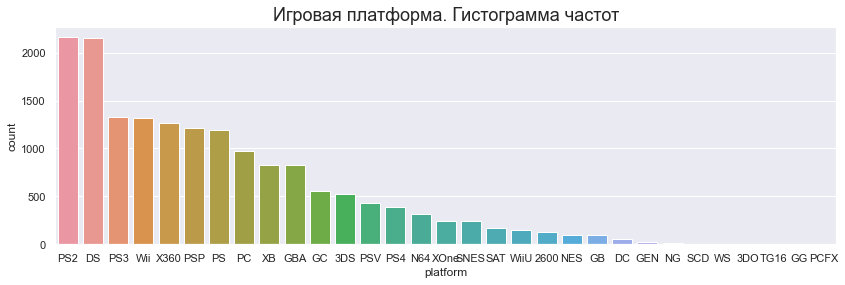

In [99]:
show_counts('platform', 'Игровая платформа')

Судя по данным, большинство игр выходят на платформах компаний Sony, Nintnedo, Microsoft а так же ПК. Это соответствует реальной ситуации на рынке компьютерных игр. Выборка выглядит репрезентативной.

**4) Рассмотрим год релиза игры в столбце `year_of_release`**

В столбце `year_of_release` 269 пропущенных записей (1.6%). Посмотрим на строки с пропусками.

In [100]:
games.loc[games['year_of_release'].isna()].tail(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16277,Homeworld Remastered Collection,PC,NaN,Strategy,0.00,0.01,0.00,0.0,86.0,8.2,E10+
16288,Shorts,DS,NaN,Platform,0.01,0.00,0.00,0.0,NaN,tbd,E10+
16293,AKB1/48: Idol to Guam de Koishitara...,X360,NaN,Misc,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16329,Brothers in Arms: Furious 4,X360,NaN,Shooter,0.01,0.00,0.00,0.0,NaN,NaN,M
16348,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.0,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.0,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.0,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16522,Virtua Quest,GC,NaN,Role-Playing,0.01,0.00,0.00,0.0,55.0,5.5,T


Данные пропущены по различным играм, игровым платформам и жанрам. Возможно, данные были утрачены при выгрузке из базы данных или на этапе сбора (неправильная выгрузка информации с сайтов).  
Так как многие игры выпущены сразу на нескольких платформах, можно продублировать эти годы релиза по одноимённым играм. Это можно сделать, так как большинство игр выходит на всех платформах одновременно. Исключение составляют лишь единичные эксклюзивные игры от Sony и Nintendo, и разница в релизе составляет не больше года. Возможные единичные ошибки в годе релиза игры не внесут больших отклонений в распределения данных.

In [101]:
# Воспользуемся методом fillna(). 
# Сгруппируем данные по названию методом groupby(), затем запишем 
games = games.fillna({'year_of_release': games.groupby('name')['year_of_release'].transform('first')})

In [102]:
print('Количество игр с неизвестным годом релиза:', len(games.loc[games['year_of_release'].isna()]))
print('Процент игр с неизвестным годом релиза:', round(len(games.loc[games['year_of_release'].isna()])/len(games)*100, 2), '%')

Количество игр с неизвестным годом релиза: 146
Процент игр с неизвестным годом релиза: 0.87 %


Оставшихся игр с неизвестным годом релиза мало (меньше 1%) от общего количества данных. Они не внесут значительных изменений в распределения данных.  
Заменим пропуски на **-1** и преобразуем тип данных в целочисленный `int16` для экономии места.

In [103]:
games['year_of_release'] = games['year_of_release'].fillna(-1)
# воспользуемся методом to_numeric() для преобразования типа данных. 
# downcast='integer' для преобразования в наименьший необходимый тип для хранения года релиза (int16)
games['year_of_release'] = pd.to_numeric(games['year_of_release'], downcast='integer') 

Посмотрим на распределение данных в столбце с помощью гистограммы.

In [104]:
def show_hists(data, data_label, num_bins, rug=False, log_scale=False):
    """
    input: data - данные для построения гистограммы
           data_label - описание данных
           num_bins - количество ячеек
    output: None
    description: Функция строит две гистограммы для выбранного параметра:
                - Плотность распределения (методом distplot() библиотеки seaborn)
                - Распределение частот (метод distplot(), kde=False)
    """
    sns.set()
    f, axes = plt.subplots(1, 2, figsize=(16, 4))
    axes[0].set_title(data_label + ". Плотность распределения", fontsize=18)
    axes[0].set_ylabel('плотность', fontsize=15)
    sns.distplot(data, bins=num_bins, rug=rug, ax=axes[0])
    axes[1].set_title(data_label + ". Распределение частот", fontsize=18)
    axes[1].set_ylabel('количество', fontsize=15)
    sns.distplot(data, bins=num_bins, kde=False, ax=axes[1])
    plt.show()

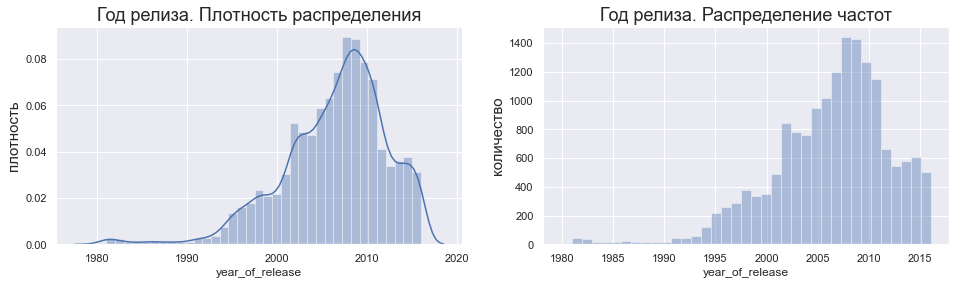

In [105]:
show_hists(games.loc[games['year_of_release'] > 0, 'year_of_release'], 'Год релиза', num_bins=37)

- До 1990 года производилось мало игр, далее ими можно будет пренебречь. 
- Больше всего записей приходится на период 2005-2010 гг, после чего наблюдается резкий спад. Возможно, это обусловлено снижением количества игровых платформ или миграцией игровой индустрии на мобильные платформы. Необходимо дальнейшее исследование.  

**5) Рассмотрим жанр игры в столбце `genre`**

Тип данных в столбце `genre` соответствует хранящейся информации (`object` для названия жанра игры). Пропущенных данных нет.  
Посмотрим на распределение данных в столбце с помощью гистограммы.

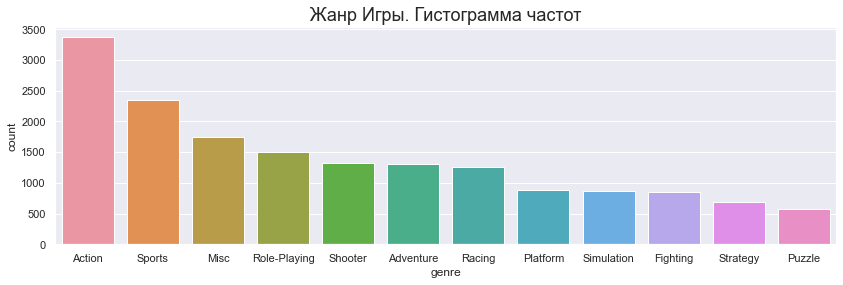

In [106]:
show_counts('genre', 'Жанр Игры')

Экшн и спортивные игры создаются чаще всего. Стратегии и пазлы пользуются наименьшей популярностью. Данные соответствуют реальной ситуации на рынке. На гистограмме нет выделяющихся неправдоподобных скачков данных, оставим данный параметр без изменений.

**6) Рассмотрим продажи в Северной Америке в столбце `na_sales`**

- Тип данных в столбце `na_sales` соответствует хранящейся информации (`float64` для миллионов проданных копий).  
Пропущенных данных нет.  
- Посмотрим на распределение данных в столбце с помощью гистограммы, а также численные значения распределения методом describe().
- Нулевые значения скорее всего означают, что игра не продавалась в данном регионе. Не будем их учитывать, чтобы не загрязнять построения.

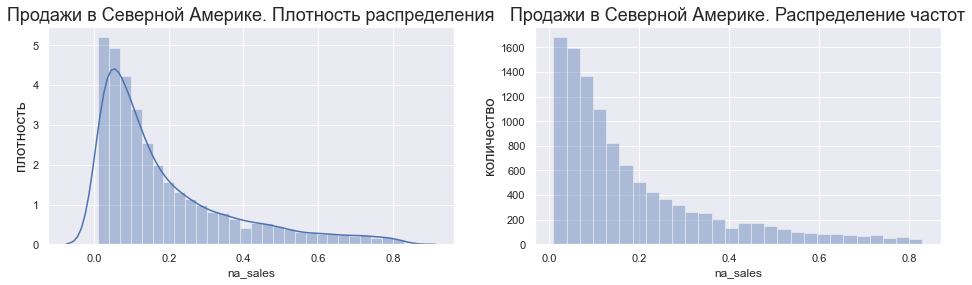

In [107]:
show_hists(games.loc[(games['na_sales'] > 0) & (games['na_sales'] < 0.84), 'na_sales'], 
           'Продажи в Северной Америке', 
           num_bins=28)

In [108]:
games.loc[games['na_sales'] > 0, 'na_sales'].describe()

count    12206.000000
mean         0.360525
std          0.933409
min          0.010000
25%          0.060000
50%          0.140000
75%          0.340000
max         41.360000
Name: na_sales, dtype: float64

Среднее значение 0.36 значительно больше медианного значения 0.14. Данные сильно скошены вправо. Все значения больше 0.76 можно считать выбросами ( (q.75 - q.25) * 1.5 + q.75 = 0.76 ).  
Большинство игр продаются в Северной Америке количеством до 0.76 миллионов копий. Однако есть ряд очень популярных игр, продающихся количеством до 41 миллиона копий. Они и вносят смещение в данные.  
Найдём долю выбросов от общего количества данных.

In [109]:
print('Доля выбросов от общего количества данных:', 
      round(len(games.loc[games['na_sales'] > 0.76]) / sum(games['na_sales'] > 0) * 100, 2), '%')

Доля выбросов от общего количества данных: 10.54 %


Доля выбросов составляет **10.5%** от общего количества продаваемых в регионе игр. Это много, нельзя просто избавиться от них. Пока оставим данные как есть.  
Далее в исследовании будем отсекать старые игры и непопулярные консоли, возможно часть выбросов отсеется.

**7) Рассмотрим продажи в Европе в столбце `eu_sales`**

- Тип данных в столбце `na_sales` соответствует хранящейся информации (`float64` для миллионов проданных копий).  
Пропущенных данных нет.  
- Посмотрим на распределение данных в столбце с помощью гистограммы, а также численные значения распределения методом describe().
- Нулевые значения скорее всего означают, что игра не продавалась в данном регионе. Не будем их учитывать, чтобы не загрязнять построения.

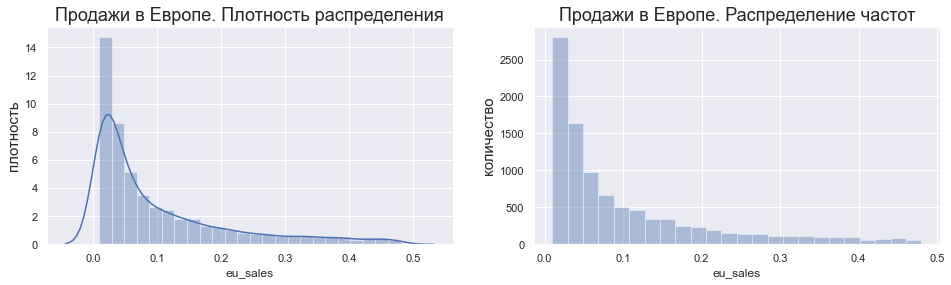

In [110]:
show_hists(games.loc[(games['eu_sales'] > 0) & (games['eu_sales'] < 0.49), 'eu_sales'], 
           'Продажи в Европе', 
           num_bins=24)

In [111]:
games.loc[games['eu_sales'] > 0, 'eu_sales'].describe()

count    10844.000000
mean         0.223547
std          0.610706
min          0.010000
25%          0.020000
50%          0.070000
75%          0.200000
max         28.960000
Name: eu_sales, dtype: float64

Среднее значение 0.22 значительно больше медианного значения 0.07. Данные сильно скошены вправо. Все значения больше 0.47 можно считать выбросами ( (q.75 - q.25) * 1.5 + q.75 = 0.47 ).  
Большинство игр продаются в Европе количеством до 0.47 миллионов копий. Однако есть ряд очень популярных игр, продающихся количеством до 29 миллионов копий. Они и вносят смещение в данные.  
Найдём долю выбросов от общего количества данных.

In [112]:
print('Доля выбросов от общего количества данных:', 
      round(len(games.loc[games['eu_sales'] > 0.47]) / sum(games['eu_sales'] > 0) * 100, 2), '%')

Доля выбросов от общего количества данных: 10.69 %


Доля выбросов составляет **10.7%** от общего количества продаваемых в регионе игр. Это много, нельзя просто избавиться от них. Пока оставим данные как есть.  

**8) Рассмотрим продажи в Японии в столбце `jp_sales`**

- Тип данных в столбце `jp_sales` соответствует хранящейся информации (`float64` для миллионов проданных копий).  
Пропущенных данных нет.  
- Посмотрим на распределение данных в столбце с помощью гистограммы, а также численные значения распределения методом describe().
- Нулевые значения скорее всего означают, что игра не продавалась в данном регионе. Не будем их учитывать, чтобы не загрязнять построения.

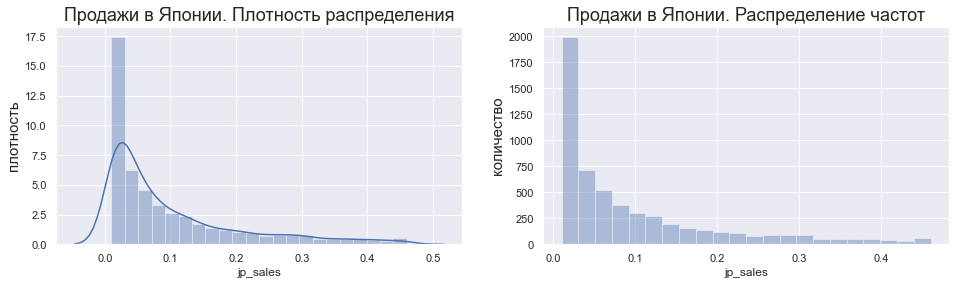

In [113]:
show_hists(games.loc[(games['jp_sales'] > 0) & (games['jp_sales'] < 0.47), 'jp_sales'], 
           'Продажи в Японии', 
           num_bins=22)

In [114]:
games.loc[games['jp_sales'] > 0, 'jp_sales'].describe()

count    6200.000000
mean        0.209248
std         0.479216
min         0.010000
25%         0.030000
50%         0.070000
75%         0.190000
max        10.220000
Name: jp_sales, dtype: float64

Среднее значение 0.21 значительно больше медианного значения 0.07. Данные сильно скошены вправо. Все значения больше 0.43 можно считать выбросами ( (q.75 - q.25) * 1.5 + q.75 = 0.43 ).  
Большинство игр продаются в Европе количеством до 0.43 миллионов копий. Однако есть ряд очень популярных игр, продающихся количеством до 10 миллионов копий. Они и вносят смещение в данные.  
Найдём долю выбросов от общего количества данных.

In [115]:
print('Доля выбросов от общего количества данных:', 
      round(len(games.loc[games['jp_sales'] > 0.43]) / sum(games['jp_sales'] > 0) * 100, 2), '%')

Доля выбросов от общего количества данных: 10.9 %


Доля выбросов составляет **10.9%** от общего количества продаваемых в регионе игр. Это много, нельзя просто избавиться от них. Пока оставим данные как есть.  

**9) Рассмотрим продажи в других странах в столбце `other_sales`**

- Тип данных в столбце `other_sales` соответствует хранящейся информации (`float64` для миллионов проданных копий).  
Пропущенных данных нет.  
- Посмотрим на распределение данных в столбце с помощью гистограммы, а также численные значения распределения методом describe().
- Нулевые значения скорее всего означают, что игра не продавалась в данном регионе. Не будем их учитывать, чтобы не загрязнять построения.

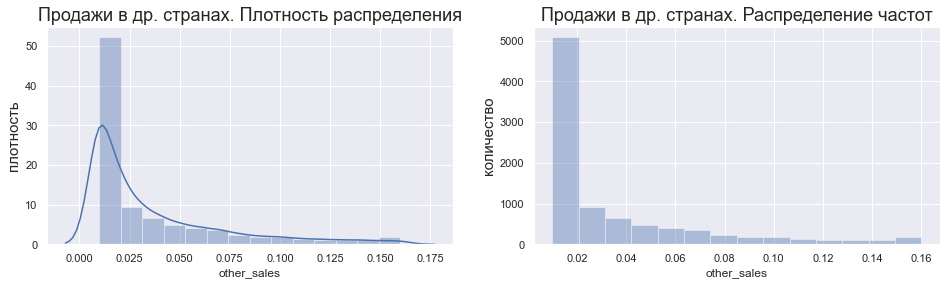

In [116]:
show_hists(games.loc[(games['other_sales'] > 0) & (games['other_sales'] < 0.17), 'other_sales'], 
           'Продажи в др. странах', 
           num_bins=14)

In [117]:
games.loc[games['other_sales'] > 0, 'other_sales'].describe()

count    10113.00000
mean         0.07824
std          0.23498
min          0.01000
25%          0.01000
50%          0.02000
75%          0.07000
max         10.57000
Name: other_sales, dtype: float64

Среднее значение 0.08 значительно больше медианного значения 0.02. Данные сильно скошены вправо. Все значения больше 0.16 можно считать выбросами ( (q.75 - q.25) * 1.5 + q.75 = 0.16 ).  
Большинство игр продаются в Европе количеством до 0.16 миллионов копий. Однако есть ряд очень популярных игр, продающихся количеством до 10.6 миллионов копий. Они и вносят смещение в данные.  
Найдём долю выбросов от общего количества данных.

In [118]:
print('Доля выбросов от общего количества данных:', 
      round(len(games.loc[games['other_sales'] > 0.16]) / sum(games['other_sales'] > 0) * 100, 2), '%')

Доля выбросов от общего количества данных: 10.18 %


Доля выбросов составляет **10.2%** от общего количества продаваемых в регионе игр. Это много, нельзя просто избавиться от них. Пока оставим данные как есть.  

**10) Рассмотрим оценки критиков в столбце `critic_score`**

- Тип данных в столбце `critic_score` соответствует хранящейся информации (`float64` для оценок критиков).  
- В данном столбце много пропущенных данных (около 50%). Посмотрим на строки с пропусками.

In [119]:
games.loc[games['critic_score'].isna()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


- Данные пропущены для разных платформ, годов релиза и жанров игр. Возможно эти оценки отсутствовали при сборе информации, или данные были утеряны в результате сбоя при загрузке/выгрузке таблицы из базы.  
- Оценки нельзя заполнять на основе имеющихся данных, так как игры одинаковых жанров, годов релиза и т.д. могут сильно оличаться друг от друга. Оценки одной игры на разных платформах также могут сильно отличаться.  
- На данный момент оставим пропуски как есть. Далее записи по старым играм и неактуальным платформам будут отсекаться. Возможно, часть пропусков отсечётся на этом этапе.

- Посмотрим на распределение данных в столбце с помощью гистограммы, а также построим `violin` для нахождения выбросов.

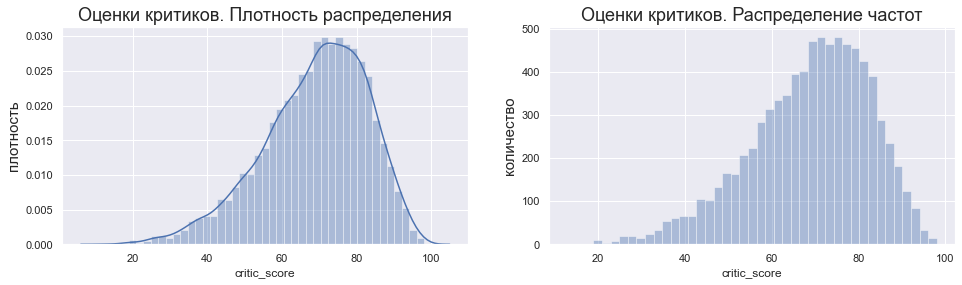

In [120]:
show_hists(games['critic_score'], 'Оценки критиков', num_bins=43)

In [121]:
# построим распределение оценок критиков с помощью метода violin() библиотеки plotly().
# box=True - для отображения ящика с усами внутри violin
px.violin(games, y="critic_score", 
          box=True, title = 'Распределение оценок критиков')

In [122]:
print('Среднее значение оценок критиков:', round(games['critic_score'].mean(), 2))

Среднее значение оценок критиков: 68.97


Среднее значение 69 немного меньше медианы 71. Данные немного скошены влево. Все значения меньше 31 можно считать выбросами.  
Найдём долю выбросов от общего количества оценок.

In [123]:
print('Доля выбросов от общего количества данных:', 
      round(len(games.loc[games['critic_score'] <= 31]) / games['critic_score'].count() * 100, 2), '%')

Доля выбросов от общего количества данных: 1.02 %


Доля выбросов небольшая (1% от общего количества оценок критиков). Можно удалить их без большого влияния на распределения данных.  
Пока оставим данные как есть (до выбора актуальных игровых платформ и актуального периода релиза игр). 

**11) Рассмотрим оценки пользователей в столбце `user_score`**

- Тип данных в столбце `user_score` не соответствует хранящейся информации, заменим его `float64` для оценок пользователей.   
- Для начала разберёмся с обозначением `tbd`. Это аббревиатура от англ. "to be determined" (для определения). Означает, что оценки игры не было на момент сбора информации. Заменим значение `tbd` на `NaN`.  

In [124]:
games.loc[games['user_score'] == "tbd", 'user_score'] = np.nan

In [125]:
# для преобразования типа данных воспользуемся методом to_numeric()
# downcast='float' - для преобразования к наименьшему необходимому типу для хранения оценок (float32)
games['user_score'] = pd.to_numeric(games['user_score'], downcast='float') 

- В данном столбце много пропущенных данных (около 55%). Посмотрим на строки с пропусками.

In [126]:
games.loc[games['user_score'].isna()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


- Данные пропущены для разных платформ, годов релиза и жанров игр. Возможно эти оценки отсутствовали при сборе информации, или данные были утеряны в результате сбоя при загрузке/выгрузке таблицы из базы.  
- Оценки нельзя заполнять на основе имеющихся данных, так как игры одинаковых жанров, годов релиза и т.д. могут сильно оличаться друг от друга. Оценки одной игры на разных платформах также могут сильно отличаться.  
- На данный момент оставим пропуски как есть. Далее записи по старым играм и неактуальным платформам будут отсекаться. Возможно, часть пропусков отсечётся на этом этапе.

- Посмотрим на распределение данных в столбце с помощью гистограммы, а также построим `violin` для нахождения выбросов.

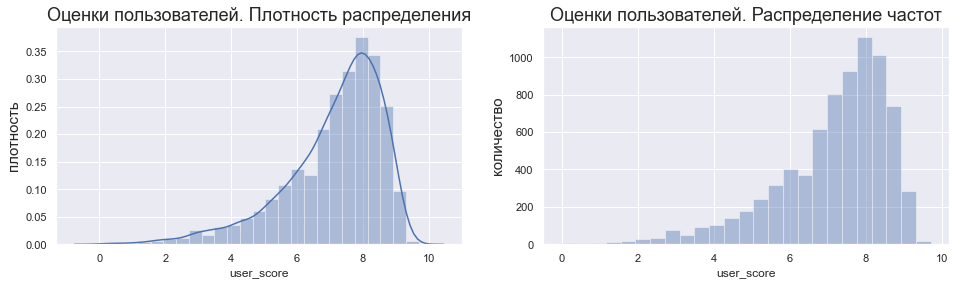

In [127]:
show_hists(games['user_score'], 'Оценки пользователей', num_bins=25)

In [128]:
# построим распределение оценок пользователей с помощью метода violin() библиотеки plotly().
# box=True - для отображения ящика с усами внутри violin
px.violin(games, y="user_score", 
          box=True, title = 'Распределение оценок пользователей')

In [129]:
print('Среднее значение оценок пользователей:', round(games['user_score'].mean(), 2))

Среднее значение оценок пользователей: 7.13


Среднее значение 7.13 немного меньше медианы 7.5. Данные немного скошены влево. Все значения меньше 3.7 можно считать выбросами.  
Найдём долю выбросов от общего количества оценок.

In [130]:
print('Доля выбросов от общего количества данных:', 
      round(len(games.loc[games['user_score'] <= 3.7]) / games['user_score'].count() * 100, 2), '%')

Доля выбросов от общего количества данных: 4.02 %


Доля выбросов высокая (4% от общего количества оценок пользователей). Их удаление может повлиять на распределения данных.  
Пока оставим данные как есть (до выбора актуальных игровых платформ и актуального периода релиза игр). 

**11) Рассмотрим рейтинг ESRB в столбце `rating`**

- Тип данных в столбце `rating` соответствует хранящейся информации (`object` аббревиатуры рейтинга).  
- Посмотрим на возможные рейтинги.  

In [131]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

По информации на сайте ESRB (https://www.esrb.org/ratings-guide/):
- `E` - everyone (контент для всех)
- `M` - mature (от 17 лет и выше)
- `T` - teen (от 13 лет и выше)
- `E10+` - everyone 10+ (от 10 лет и выше)
- `K-A` - kids to adults (старое обозначение рейтинга "E")
- `AO` - adults only (от 18 лет и выше)
- `EC` - early childhood (заменён рейтингом "E" ввиду малого использования)
- `RP` - rating pending (рейтинг пока не определён)  

Заменим значения `EC`, `K-A` на `E`. Значений `RP` всего 3, заменим их на np.nan (неопределённый рейтинг)

In [132]:
games.loc[(games['rating'] == 'EC') | (games['rating'] == 'K-A'), 'rating'] = 'E'
games.loc[games['rating'] == 'RP', 'rating'] = np.nan
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO'], dtype=object)

- В данном столбце много пропущенных данных (около 40%). Посмотрим на строки с пропусками.

In [133]:
games.loc[games['rating'].isna()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


- Данные пропущены для разных платформ, годов релиза и жанров игр. Возможно эти рейтинги при сборе информации, или данные были утеряны в результате сбоя при загрузке/выгрузке таблицы из базы.  
- Рейтинги нельзя заполнять на основе имеющихся данных, так как игры одинаковых жанров, годов релиза и т.д. могут сильно оличаться друг от друга.  
- На данный момент оставим пропуски как есть. Далее записи по старым играм и неактуальным платформам будут отсекаться. Возможно, часть пропусков отсечётся на этом этапе.

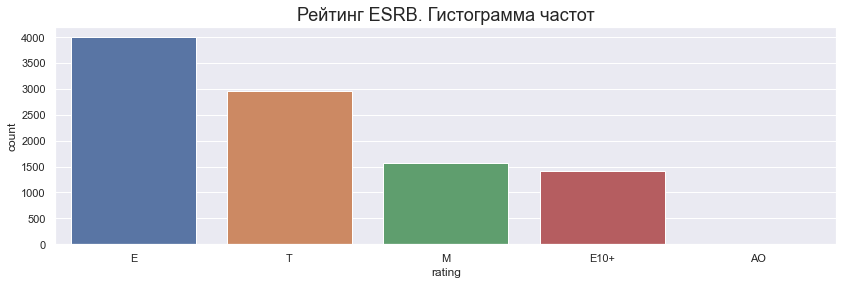

In [134]:
show_counts('rating', 'Рейтинг ESRB')

Большая часть данных распределена между рейтингами 'E', 'M', 'T', 'E10+'. В рейтинге 'AO' всего одна запись. Производители игр стараются создавать контент для максимального количества пользователей, так как это увеличивает продажи.

### 2.2 Расчёт дополнительных параметров

- Посчитаем суммарные продажи во всех регионах и запишем их в столбец `tot_sales`.

In [135]:
games['tot_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

- Тип данных в столбце `tot_sales` соответствует хранящейся информации (`float64` для миллионов проданных копий).  
Пропущенных данных нет.  

In [136]:
# найдём строки с нулевыми продажами во всех регионах
games.loc[games['tot_sales'] == 0]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,tot_sales
16676,G1 Jockey 4 2008,PS3,2008,Sports,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0


Есть две записи без данных по продажам и оценкам. Их можно удалить без ущерба дальнейшим исследованиям.

In [137]:
games = games.loc[games['tot_sales'] > 0]

- Посмотрим на распределение данных в столбце с помощью гистограммы, а также численные значения распределения методом describe().
- Нулевых значений в данном столбце практически нет, так как все игры продавались хотя бы в одном регионе.

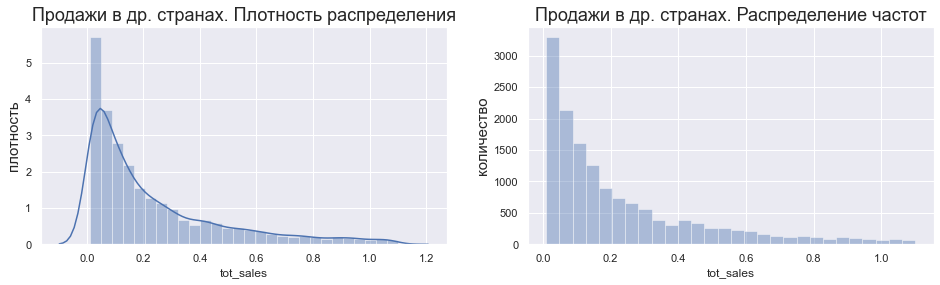

In [138]:
show_hists(games.loc[games['tot_sales'] < 1.1, 'tot_sales'], 
           'Продажи в др. странах', 
           num_bins=28)

In [139]:
games['tot_sales'].describe()

count    16711.000000
mean         0.533379
std          1.548364
min          0.010000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: tot_sales, dtype: float64

Среднее значение 0.53 значительно больше медианного значения 0.17. Данные сильно скошены вправо. Все значения больше 1.09 можно считать выбросами.  
Большинство игр продаются по миру количеством до 1.09 миллионов копий. Однако есть ряд очень популярных игр, продающихся количеством до 82.5 миллионов копий. Они и вносят смещение в данные.  
Найдём долю выбросов от общего количества данных.

In [140]:
print('Доля выбросов от общего количества данных:', 
      round(len(games.loc[games['tot_sales'] >= 1.09]) / len(games) * 100, 2), '%')

Доля выбросов от общего количества данных: 11.27 %


Доля выбросов составляет **11.3%** от общего количества продаваемых в мире игр. Это много, нельзя просто избавиться от них. Пока оставим данные как есть.  

In [141]:
# посмотрим на общую информацию о таблице после преобразования
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16711 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16711 non-null  object 
 1   platform         16711 non-null  object 
 2   year_of_release  16711 non-null  int16  
 3   genre            16711 non-null  object 
 4   na_sales         16711 non-null  float64
 5   eu_sales         16711 non-null  float64
 6   jp_sales         16711 non-null  float64
 7   other_sales      16711 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float32
 10  rating           9946 non-null   object 
 11  tot_sales        16711 non-null  float64
dtypes: float32(1), float64(6), int16(1), object(4)
memory usage: 1.5+ MB


### Выводы

- Названия столбцов были приведены к нижнему регистру.
- Типы данных были преобразованы в соответствии с хранимой информацией. 
    - Год релиза игры `year_of_release` заменён на `int16` для уменьшения занимаемого места
    - Оценка пользователей `user_score` заменена на `float32` (значения `tbd` заменены на `np.nan`, так как в данном случае оценки нет)  
- Пропуски были исследованы и обработаны.
    - В столбце `year_of_release` пропуски по возможности заменены годом релиза той же игры на другой платформе.  
    Оставшиеся пропуски заменены на -1 (для преобразования типа данных в столбце)
    - В столбце `user_score` значения `tbd` заменены на `np.nan`, так как в данном случае оценки отсутствуют
    - В столбце `rating` значения `RP` заменены на `np.nan`, так как рейтинг в данном случае отсутствует
    - В остальных столбцах пропуски оставлены как есть, так как нет возможности обработать их по имеющейся информации. Доля пропусков в столбцах достигает 55%. Возможно часть пропущенных данных отсечётся при выборе актуального периода и актуальных игровых платформ далее.
    - Возможные причины пропусков: отсутствие информации при сборе данных, или сбой в системе при загрузке/выгрузке таблицы из базы данных
- Добавлен параметр суммарных продаж в столбец `tot_sales`.
- Рассмотрены распределения числовых параметров. 
    - Данные по продажам сильно скошены вправо. Доля выбросов достигает 11.3%.  
    Большинство игр продаются по миру количеством до 1.09 миллионов копий. Однако есть ряд очень популярных игр, продающихся количеством до 82.5 миллионов копий. Они и вносят смещение в данные.
    - Данные по оценкам немного скошены влево. Доля выбросов достигает 4%.
    - Выбросы не были удалены и будут обработаны после выбора актуального периода и актуальных игровых платформ.
- В параметре `rating` старые значения заменены актуальными (по информации из сайта ESRB)

## Шаг 3. Исследовательский анализ данных

### 3.1 Выбор актуальных игровых платформ и периода релиза игр

Рассмотрим распределение года релиза игр. Построим гистограмму.

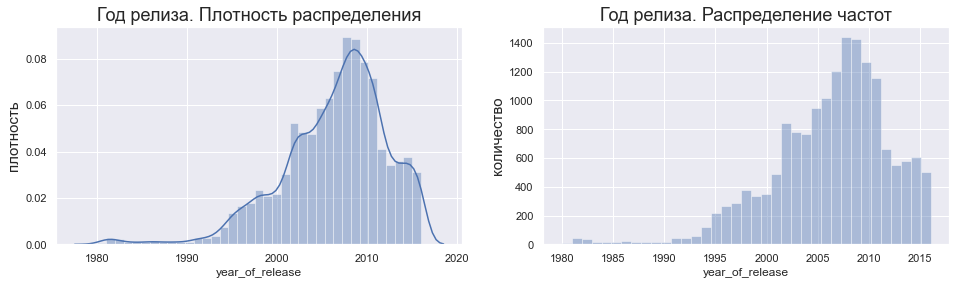

In [142]:
show_hists(games.loc[games['year_of_release'] > 0, 'year_of_release'], 'Год релиза', num_bins=37)

- До 1990 года выпускалось мало игр. Также актуальность таких игр устарела. Нет необходимости учитывать их в исследованиях. 
- Однако помимо года релиза необходимо учитывать и актуальность игровых платформ. Посмотрим, как менялись продажи по платформам:  
    - Найдём платформы, на которые выпускаются игры в 2016 году
    - Выберем из них платформы с наибольшими суммарными продажами
    - Построим распределение суммарных продаж по годам.

In [143]:
# найдём платформы, на которые выпускались игры в 2016 году
cur_platforms = (games
                 .loc[games['year_of_release'] == 2016, 'platform']
                 .unique()
                )
print('Актуальные платформы на 2016 год:', cur_platforms)

Актуальные платформы на 2016 год: ['PS4' '3DS' 'XOne' 'WiiU' 'PS3' 'PC' 'X360' 'PSV' 'Wii']


In [144]:
# найдём игровые платформы с максимальными продажами за всё время
top_platforms = (games
                 .groupby('platform')['tot_sales']      # сгруппируем данные по платформам и выделим суммарные продажи
                 .agg('sum')                            # посчитаем ощие продажи за все года
                 .sort_values(ascending=False)          # отсортируем по убыванию
                 .reset_index()                         # для удобства вынесем индекс (платформа) в отдельную колонку
                 .head(20)                              # отсеем платформы с небольшими продажами
                 ['platform']
                )
print('Платформы с наибольшими суммарными продажами:', 
     top_platforms.values.reshape(1,len(top_platforms)))

Платформы с наибольшими суммарными продажами: [['PS2' 'X360' 'PS3' 'Wii' 'DS' 'PS' 'GBA' 'PS4' 'PSP' 'PC' '3DS' 'XB'
  'GB' 'NES' 'N64' 'SNES' 'GC' 'XOne' '2600' 'WiiU']]


- Определим характерный срок жизни игровых платформ. Для этого построим `lineplot` суммарных продаж по годам для основных игровых платформ.

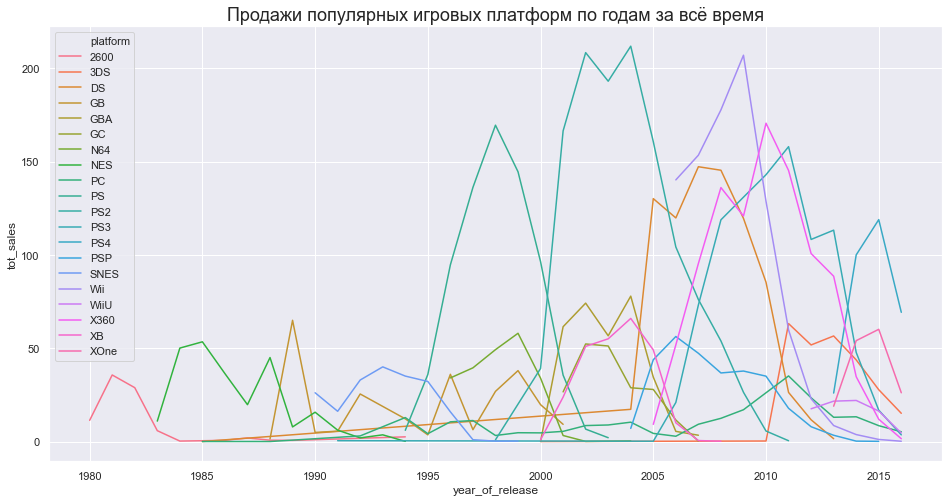

In [145]:
def show_lines(data, year, title):
    """
    input: data [pd.DataFrame] - таблица данных для построения граафика
           year [int16] - год начала построения данных
           title [str] - название графика
    output: None
    description: Функция строит график суммарных продаж по годам для выбранных платформ
                 Используется функция lineplot() библиотеки seaborn
    """
    plt.figure(figsize=(16,8))
    plt.title(title, fontsize=18)
    sns.lineplot(x='year_of_release',
                y='tot_sales',
                hue='platform',
                markers=True,
                data=(data
                      .query('year_of_release >= @year')              # почти все актуальные платформы появились после 2000 года
                      .groupby(['platform','year_of_release'])['tot_sales']   # группируем по платформам и годам
                      .agg('sum')                                             # считаем суммы продаж по платформам и годам
                      .reset_index()
                     )
                )
show_lines(games.query('platform in @top_platforms'), 
           1980, 
           'Продажи популярных игровых платформ по годам за всё время')

- По графику можно наблюдать, что основные платформы за всё время были популярны **от 5 до 10 лет**.

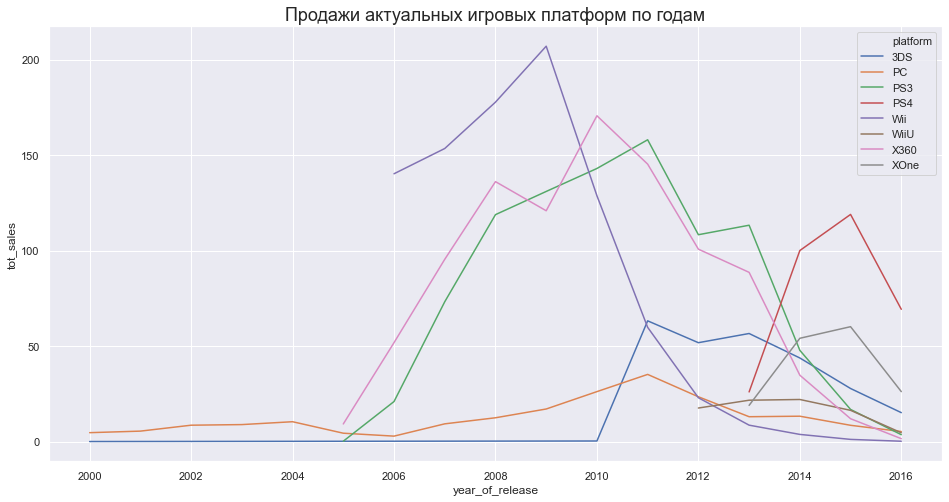

In [146]:
# срез из изначальной таблице платформы по актуальным платформаам и платформам с максимальными продажами
games_actual = games.query('platform in @top_platforms and platform in @cur_platforms')
# построим распределение суммарных продаж по годам для актуальных на 2016 год платформ
show_lines(games_actual, 
           2000, 
           'Продажи актуальных игровых платформ по годам')

- По графику видно, что большинство актуальных на 2016 год игровых платформ появились после 2010 года.  
Будем считать соответствующий **Актуальный период с 2010 по 2016 год**
- Также отметим, что актуальные на 2010 год 'PS3' и 'X360' к 2016 практически полностью утратили продажи, так как были заменены в 2013 году новыми поколениями игровых платформ 'PS4', 'Wii' и 'XOne'. В данном случае нет смысла продвигать старые платформы, не будем их учитывать при анализе.  
- Игровые платформы для исследования: **'PS4', '3DS', 'XOne', 'WiiU', 'PC'**.
- Построим распределение суммарных продаж по годам для актуальных игровых платформ за актуальный период.

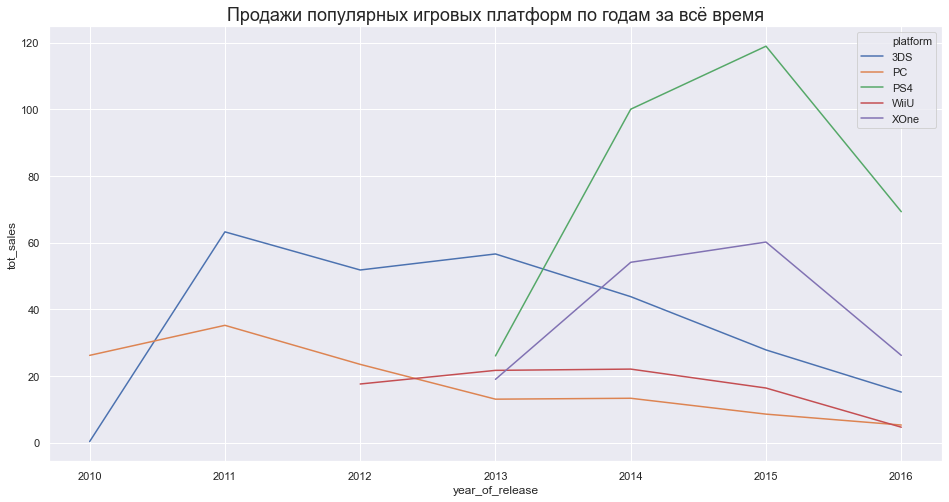

In [147]:
act_platforms = ['PS4', '3DS', 'XOne', 'WiiU', 'PC']
show_lines(games.query('platform in @act_platforms'), 
           2010, 
           'Продажи популярных игровых платформ по годам за всё время')

In [148]:
# выделим срез данных по актуальным платформам и периоду релиза игр
games_actual = games_actual.query('platform in @act_platforms and year_of_release >= 2010')

- Спад уровня продаж для 'PS4', 'WiiU' и 'XOne' в 2016 году скорее всего объясняется тем, что информация не полная (год не закончен на момент сбора данных).
- Проанализируем изменения суммарных продаж выбранных платформ по времени:
    - 'PS4' и 'XOne' демонстрируют рост уровня суммарных продаж с 2013 по 2015 год. 
    - 'PS4' лидер по продажам на момент конца 2015 года и на момент сбора данных в 2016 году.
    - Суммарные продажи '3DS' медленно падают с 2011 года.  
    - Суммарные продажи 'WiiU' практически не меняются, оставаясь на уровне 20 млн копий с 2012 по 2015 год.
    - Суммарные продажи игр на 'PC' невысокие (макимум 35 млн копий в 2011 году) и медленно падают с 2011г.  
    Однако игры на 'PC' продаются с 1980-х годов, с плавными подъёмами и спадами. В этом смысле 'PC' самая стабильная из всех рассматриваемых игровых платформ. 

### 3.2 Исследование продаж по актуальным платформам

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.  
Воспользуемся функцией violin из библиотеки plotly.

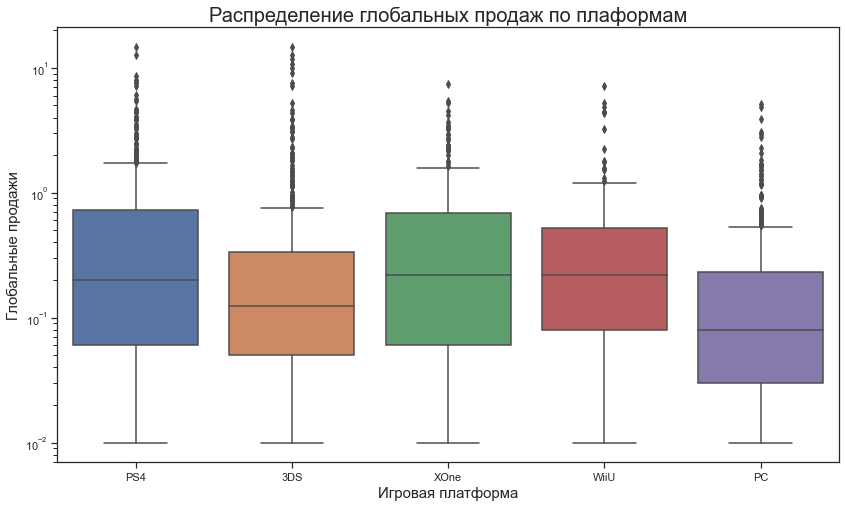

In [149]:
# построим распределение глобальных продаж с помощью метода boxplot() библиотеки seaborn().
# данные построим на логарифмиеской оси для наглядности (в данных много выбросов, которые искажают boxplot)
plt.figure(figsize=(14,8))
sns.set(style="ticks")
ax = sns.boxplot(data=games_actual, y="tot_sales", x='platform')
ax.set_title('Распределение глобальных продаж по плаформам', fontsize=20)
ax.set_xlabel('Игровая платформа', fontsize=15)
ax.set_ylabel('Глобальные продажи', fontsize=15)
ax.set(yscale="log")
plt.show()

Найдём общую долю выбросов для глобальных продаж по всем платформам.

In [150]:
games_actual['tot_sales'].describe()

count    1788.000000
mean        0.525157
std         1.231056
min         0.010000
25%         0.040000
50%         0.130000
75%         0.430000
max        14.630000
Name: tot_sales, dtype: float64

In [151]:
print('Доля выбросов от общего количества данных:', 
      round(len(games_actual.loc[games_actual['tot_sales'] >= (0.43-0.04)*1.5+0.43]) / len(games_actual) * 100, 2), '%')

Доля выбросов от общего количества данных: 12.3 %


- В данных по прежнему много выбросов (12.3% от общего количества данных). Это свойство данного датасета, оставим их как есть.  
Значения глобальных продаж по всем платформам сильно скошены вправо. Есть достаточно большое количество игр с очень высокими показателями продажам по сравнению со средними значениями.
- Медианные значения уровня глобальных продаж у 'PS4', 'XOne' и 'WiiU' примерно одинаковы (0.2 млн копий). У 'WiiU' дисперсия немного меньше, чем у 'PS4' и 'XOne'. Однако ранее было замечено, что суммарные продажи по годам для платформ 'PS4', 'XOne' заметно выше, чем у 'WiiU'. Большое количество выбросов (игр с очень высоким уровнем продаж) у 'PS4' и 'XOne' сильно увеличивают суммарные продажи.
- Наименьшее медианное значение глобальных продаж у платформы 'PC'.

### 3.3 Влияние отзывов пользователей и критиков на продажи по платформе 'PC'

- Посмотрим, как влияют на продажи внутри `PC` отзывы пользователей и критиков. 
    - Построим диаграмму рассеяния с помощью функции `pairplot` библиотеки `seaborn`
    - Посчитаем корреляцию между отзывами и продажами.

c:\users\андрей\appdata\local\programs\python\python38\lib\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning:

invalid value encountered in greater



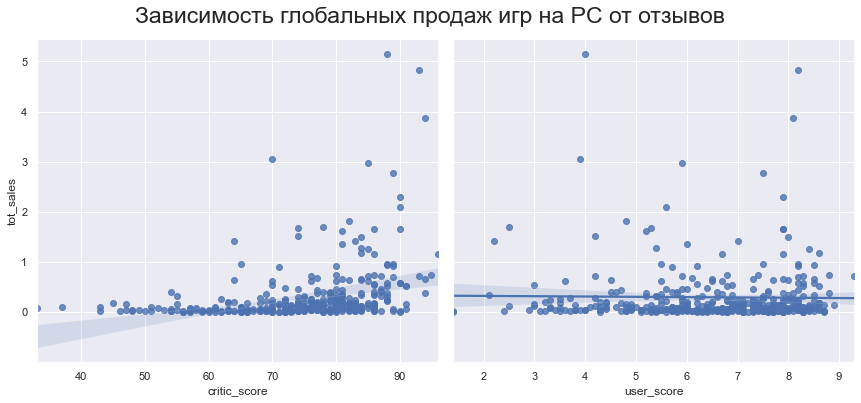

In [152]:
# возьмём срез данных по платформе PC, сохраним его в переменной games_pc. 
games_pc = games_actual.loc[(games_actual['platform'] == 'PC')]
sns.set()
ax = sns.pairplot(games_pc,                                # pairplot используем для совместного отображения графиков
                  x_vars=['critic_score','user_score'],    # зависимостей  продаж от critic_score и user_score
                  y_vars=['tot_sales'],
                  height=5, aspect=1.2, 
                  kind="reg"                               # для отображения линии регрессии
            )
ax.fig.suptitle("Зависимость глобальных продаж игр на PC от отзывов", y=1.08, size=23)
plt.show()

In [153]:
# посчитаем коэффициенты корреляции между глобальными продажами игр на PC и отзывами на игры
games_pc[['tot_sales', 'critic_score','user_score']].corr()

,tot_sales,critic_score,user_score
tot_sales,1.000000,0.337270,-0.016365
critic_score,0.337270,1.000000,0.478382
user_score,-0.016365,0.478382,1.000000


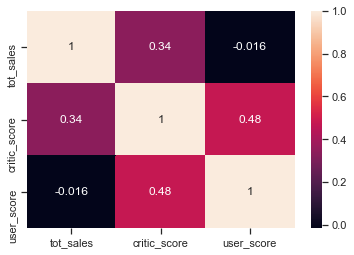

In [172]:
# визуализируем матрицу корреляции с помощью heatmap библиотеки seaborn
sns.heatmap(games_pc[['tot_sales', 'critic_score', 'user_score']].corr(), annot=True)

- На графиках видно, что между глобальными продажами игр на PC и отзывами критиков есть небольшая корреляция. Это также подтверждается коэффициентом корреляции **0.34**
- Между глобальными продажами игр на PC и отзывами пользователей корреляции не наблюдается. Это также подтверждается коэффициентом корреляции **-0.02**. Отрицательное значение может быть обусловлено выбросами.
- Посмотрим на коэффициенты корреляции без влияния выбросов.  
Судя по графику boxplot в предыдущем пункте, для платформы PC выбросы начинаются со значения глобальных продаж **0.6**. Возьмём срез данных по этому значению и посчитаем коэффициенты корреляции.

In [158]:
(games_pc
 .loc[games_pc['tot_sales'] <= 0.6]
 [['tot_sales', 'critic_score','user_score']]
 .corr()
)

,tot_sales,critic_score,user_score
tot_sales,1.000000,0.381768,0.036176
critic_score,0.381768,1.000000,0.495483
user_score,0.036176,0.495483,1.000000


- Коэффициенты корреляции практически не изменились. 
    - corr('tot_sales', 'critic_score') = 0.38
    - corr('tot_sales', 'user_score') = 0.04    - теперь значение положительное.

- Найдём коэффициенты корреляции по остальным платформам и сравним результаты.

In [159]:
(games_actual
 .groupby(['platform'])
 [['tot_sales','critic_score','user_score']]
 .agg('corr')
 .reset_index()
 .query('level_1 == "tot_sales"')
 .iloc[:,[0,1,3,4]]
)

,platform,level_1,critic_score,user_score
0,3DS,tot_sales,0.348216,0.222305
3,PC,tot_sales,0.337270,-0.016365
6,PS4,tot_sales,0.406568,-0.031957
9,WiiU,tot_sales,0.348380,0.400219
12,XOne,tot_sales,0.416998,-0.068925


- Между глобальными продажами и оценками критиков наблюдается небольшая корреляция **(0.34 - 0.42)** по всем игровым платформам.
- Между глобальными продажами и оценками пользователей корреляция не наблюдается по платформам `PS4`, `XOne` и `PC`.  
Однако для платформы `3DS` наблюдается небольшая корреляция **0.22** между этими параметрами.  
Для платформы `WiiU` корреляция ещё выше **(0.4)** (показатель выше, чем корреляция с оценками критиков).  
- Можно сделать вывод, что пользователи игровой платформы `WiiU` перед покупкой очередной игры интересуются мнением других игроков (помимо оценок критиков).
- В целом оценки критиков важнее для продвижения игровой платформы (хотя об игроках тоже не стоит забывать, ведь игры делаются для них).

### 3.4 Влияние жанра игры на продажи

- Посмотрим на общее распределение игр по жанрам.

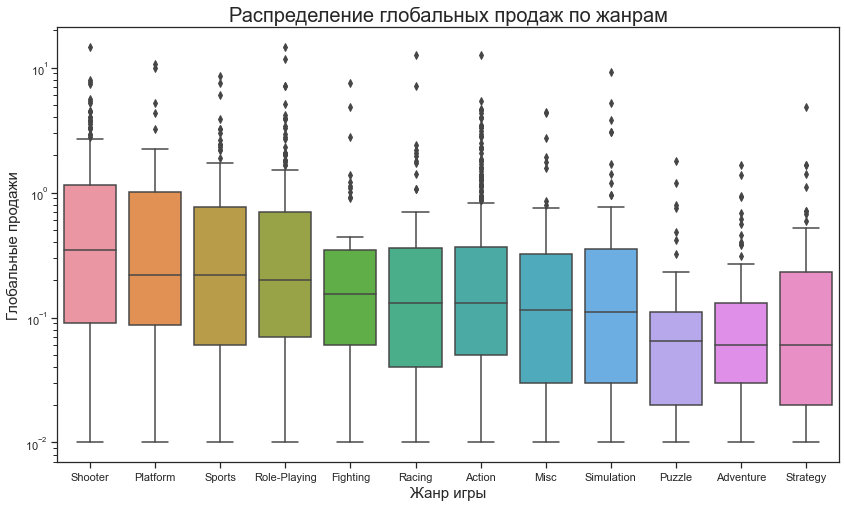

In [160]:
# отсортируем список жанров игр по убыванию медианы глобальных продаж
genres_sorted = (games_actual
                 .groupby('genre')['tot_sales']
                 .agg('median')
                 .sort_values(ascending=False)
                 .index
                )
# построим распределение глобальных продаж с помощью метода boxplot() библиотеки seaborn().
# графики построим на логарифмиеской оси для наглядности (в данных много выбросов, которые искажают boxplot)
plt.figure(figsize=(14,8))
sns.set(style="ticks")
ax = sns.boxplot(data=games_actual, y="tot_sales", x='genre', order = genres_sorted)
# order = genres_sorted - для расстановки ящиков в порядке убывания глобальных продаж
ax.set_title('Распределение глобальных продаж по жанрам', fontsize=20)
ax.set_xlabel('Жанр игры', fontsize=15)
ax.set_ylabel('Глобальные продажи', fontsize=15)
ax.set(yscale="log")
plt.show()

- Самым популярным и продаваемым жанром является `Shooter` (медианное значение **0.35 млн копий** по всем платформам).  
Также популярными являются жанры `Platform` `Sports` и `Role-Playing` (медианное значение **0.2 млн копий** по всем платформам).  
Именно на эти жанры стоит обратить внимание при продвижении игровых платформ.  
- Наименее продаваемыми являются жанры `Pazzle`, `Adventure`, `Strategy` (медианное значение **0.06 млн копий** по всем платформам)
- По всем жанрам также много выбросов. В каждом жанре есть популярные игры с уровнем продаж на порядки выше средних значений.

### Выводы

- Проанализированы уровни глобальных продаж по различным игровым платформам. Выделены основные популярные платформы на 2016 год  **'PS4', '3DS', 'XOne', 'WiiU', 'PC'**.
- Выделен актуальный период для исследования игр **с 2010 по 2016 гг**.  
Рассмотрены изменения продаж выбранных игровых платформ за актуальный период.  
- Лидером по суммарным продажам является `PS4`. Однако медианные значения для `XOne` и `WiiU` выше чем у `PS4`. Такая разница обусловлена большим количеством выбросов (популярные игры с высокими продажами). Доля выбросов около **12%**.
- Наименьшее медианное значение глобальных продаж у платформы `PC`. Однако игры на 'PC' продаются с 1980-х годов, с плавными подъёмами и спадами. В этом смысле 'PC' самая стабильная из всех рассматриваемых игровых платформ. 
- Рассмотрено влияние отзывов пользователей и критиков на продажи по платформе 'PC'. Рассчитаны коэффициенты корреляции между продажами и оценками для всех платформ. 
    - Между глобальными продажами и оценками критиков наблюдается небольшая корреляция **(0.34 - 0.42)** по всем игровым платформам.  
    - Между глобальными продажами и оценками пользователей корреляция не наблюдается по платформам `PS4`, `XOne` и `PC`.  
Для платформы `3DS` наблюдается небольшая корреляция **0.22** между этими параметрами.  
Для платформы `WiiU` корреляция ещё выше **(0.4)**. Пользователи игровой платформы `WiiU` перед покупкой очередной игры интересуются мнением других игроков (помимо оценок критиков).
    - В целом оценки критиков важнее для продвижения игровой платформы.
- Рассмотрено влияние жанра игры на продажи.
    - Самым популярным и продаваемым жанром является Shooter (медианное значение **0.35 млн копий** по всем платформам).
    - Наименее продаваемыми являются жанры `Pazzle`, `Adventure`, `Strategy` (медианное значение **0.06 млн копий**)
    - По всем жанрам также много выбросов. В каждом жанре есть популярные игры с уровнем продаж на порядки выше средних значений.

## Шаг 4. Портрет пользователя каждого региона

- Определим для пользователей каждого региона (NA, EU, JP):
    - Самые популярные платформы (топ-5). Опишем различия в долях продаж.
    - Самые популярные жанры (топ-5).
    - Влияние рейтинга ESRB на продажи в отдельном регионе.

**1)** Представим в сводной таблице доли продаж по различным платформам для каждого региона:

In [161]:
platform_fracs = (games
                  .loc[games['year_of_release'] >= 2010]                     # срез данных по актупльному периоду;
                  .groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']] # группируем по платформам;
                  .agg('sum')                                                # сумма по продажам в регионах для разных платформ;
                  .apply(lambda x: round(x / float(x.sum()), 2))             # считаем долю продаж для игровой платформы 
                 )                                                           # от общих продаж в регионе за актуальный период;
platform_fracs

,na_sales,eu_sales,jp_sales
platform,,,
3DS,0.07,0.07,0.33
DS,0.05,0.03,0.09
PC,0.04,0.08,0.00
PS2,0.00,0.00,0.00
PS3,0.20,0.25,0.19
PS4,0.10,0.17,0.05
PSP,0.01,0.01,0.14
PSV,0.01,0.02,0.07
Wii,0.11,0.08,0.06


In [162]:
print('Топ 5 платформ для Северной Америки:')
display(platform_fracs
        .sort_values(by='na_sales',ascending=False)   # сортируем данные по убыванию и берём первые 5 игровых платформ
        .head(5)
       )

Топ 5 платформ для Северной Америки:


,na_sales,eu_sales,jp_sales
platform,,,
X360,0.30,0.19,0.02
PS3,0.20,0.25,0.19
Wii,0.11,0.08,0.06
PS4,0.10,0.17,0.05
XOne,0.08,0.06,0.00


In [163]:
print('Топ 5 платформ для Европы:')
display(platform_fracs
        .sort_values(by='eu_sales',ascending=False)
        .head(5)
       )

Топ 5 платформ для Европы:


,na_sales,eu_sales,jp_sales
platform,,,
PS3,0.20,0.25,0.19
X360,0.30,0.19,0.02
PS4,0.10,0.17,0.05
PC,0.04,0.08,0.00
Wii,0.11,0.08,0.06


In [164]:
print('Топ 5 платформ для Японии:')
display(platform_fracs
        .sort_values(by='jp_sales',ascending=False)
        .head(5)
       )

Топ 5 платформ для Японии:


,na_sales,eu_sales,jp_sales
platform,,,
3DS,0.07,0.07,0.33
PS3,0.20,0.25,0.19
PSP,0.01,0.01,0.14
DS,0.05,0.03,0.09
PSV,0.01,0.02,0.07


- Для Европы и Северной Америки предпочтения в игровых платформах схожи. В ТОП5 разные поколения `PS`, `Nintendo` (Wii) и `Xbox`. В Европе также предпочтение отдают играм на `PC`.  
- В Японии же кроме `PS` популярны платформы серии `DS`. 
- Это может быть обусловлено различиями на рынке компьютерных игр в Японии и мире. Многие игры создаются в Японии для своих платформ и своей аудитории (не выходя на международный рынок). 

**2)** Представим в сводной таблице доли продаж по различным жанрам для каждого региона:

In [165]:
genres_fracs = (games
                  .loc[games['year_of_release'] >= 2010]                     # срез данных по актупльному периоду;
                  .groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']]    # группируем по жанрам;
                  .agg('sum')                                                # сумма по продажам в регионах для разных жанров;
                  .apply(lambda x: round(x / float(x.sum()), 2))             # считаем долю продаж для каждого жанра 
                 )                                                           # от общих продаж в регионе за актуальный период;
genres_fracs

,na_sales,eu_sales,jp_sales
genre,,,
Action,0.26,0.28,0.24
Adventure,0.02,0.02,0.05
Fighting,0.03,0.02,0.05
Misc,0.11,0.08,0.08
Platform,0.05,0.05,0.05
Puzzle,0.01,0.01,0.01
Racing,0.04,0.06,0.02
Role-Playing,0.10,0.09,0.34
Shooter,0.21,0.20,0.05


In [166]:
print('Топ 5 жанров для Северной Америки:')
display(genres_fracs
        .sort_values(by='na_sales',ascending=False)   # сортируем данные по убыванию и берём первые 5 игровых платформ
        .head(5)
       )

Топ 5 жанров для Северной Америки:


,na_sales,eu_sales,jp_sales
genre,,,
Action,0.26,0.28,0.24
Shooter,0.21,0.20,0.05
Sports,0.14,0.14,0.05
Misc,0.11,0.08,0.08
Role-Playing,0.10,0.09,0.34


In [167]:
print('Топ 5 жанров для Европы:')
display(genres_fracs
        .sort_values(by='eu_sales',ascending=False)   # сортируем данные по убыванию и берём первые 5 игровых платформ
        .head(5)
       )

Топ 5 жанров для Европы:


,na_sales,eu_sales,jp_sales
genre,,,
Action,0.26,0.28,0.24
Shooter,0.21,0.20,0.05
Sports,0.14,0.14,0.05
Role-Playing,0.10,0.09,0.34
Misc,0.11,0.08,0.08


In [168]:
print('Топ 5 жанров для Японии:')
display(genres_fracs
        .sort_values(by='jp_sales',ascending=False)   # сортируем данные по убыванию и берём первые 5 игровых платформ
        .head(5)
       )

Топ 5 жанров для Японии:


,na_sales,eu_sales,jp_sales
genre,,,
Role-Playing,0.10,0.09,0.34
Action,0.26,0.28,0.24
Misc,0.11,0.08,0.08
Adventure,0.02,0.02,0.05
Fighting,0.03,0.02,0.05


- ТОП5 жанров для Европы и Северной Америки практически не отличаются `Action`, `Shooter`, `Sports`, `Misc`, `Role-Playing`. Это также свидетельствует о том, что данные регионы представляют часть глобального рынка игровой индустрии. В данных регионах играют в одни и те же игры.
- Японский рынок отличается. Помимо `Role-Playing`, `Action` и `Misc` там любят `Fighting` и `Adventure`. А `Shooter` и `Sports` покупают гораздо меньше, чем в других регионах. Это может быть обусловлено менталитетом игроков и обособленностью рынка.

**3)** Представим в сводной таблице доли продаж игр по рейтингу ESRB для каждого региона:

In [169]:
genres_fracs = (games
                  .loc[games['year_of_release'] >= 2010]                     # срез данных по актупльному периоду;
                  .groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']]    # группируем по жанрам;
                  .agg('sum')                                                # сумма по продажам в регионах для разных жанров;
                  .apply(lambda x: round(x / float(x.sum()), 2))             # считаем долю продаж для каждого жанра 
                 )                                                           # от общих продаж в регионе за актуальный период;
genres_fracs

,na_sales,eu_sales,jp_sales
rating,,,
E,0.28,0.28,0.36
E10+,0.16,0.14,0.10
M,0.39,0.42,0.23
T,0.16,0.16,0.32


- По рейтингу ESRB регионы Северная Америка и Европа также очень похожи. Большинство игр покупают с рейтингом 'M' (17+) и 'Е' (без ограничений). Реже для 'E10+' и 'T'. Это может быть обусловлено запросом игроков на взрослый контент в играх (рейтинг 'М') и желанием компаний охватывать максимальное количество возрастных групп (игры категории 'E').
- Рынок Японии отличается. Большинство игр покупают для детей и подростков (категории 'E' и 'T'). Игры для взрослых покупают меньше, чем в среднем в Европе и северной америке. Это также обуславливается менталитетом игроков.

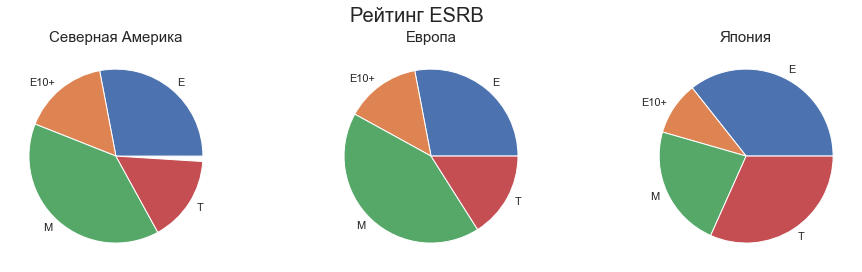

In [196]:
# Визуализируем портреты пользователей по рейтингу ESRB с помощью pie.
fig = plt.figure(figsize=(16,4))
fig.suptitle('Рейтинг ESRB', fontsize=20, y=1.02)
ax1 = plt.subplot(131)
# построим quantile-quantile plots методом probplot() из библиотеки stats для обеих выборок
plt.pie(genres_fracs['na_sales'], labels=genres_fracs.index)
ax1.set_title('Северная Америка', fontsize=15)

ax2 = plt.subplot(132)
plt.pie(genres_fracs['eu_sales'], labels=genres_fracs.index)
ax2.set_title('Европа', fontsize=15)

ax3 = plt.subplot(133)
plt.pie(genres_fracs['jp_sales'], labels=genres_fracs.index)
ax3.set_title('Япония', fontsize=15)
plt.show()

### Выводы

- Найдены ТОП5 платформ с максимальными долями продаж для Северной Америки, Европы и Японии.
    - Для Европы и Северной Америки предпочтения в игровых платформах схожи. В ТОП5 разные поколения `PS`, `Nintendo` (Wii) и `Xbox`. В Европе также предпочтение отдают играм на `PC`.  
    - В Японии же кроме `PS` популярны платформы серии `DS`. 
- Найдены ТОП5 жанров с максимальными долями продаж для Северной Америки, Европы и Японии.
    - Для Европы и Северной Америки данные практически не отличаются `Action`, `Shooter`, `Sports`, `Misc`, `Role-Playing`.
    - В Японии помимо `Role-Playing`, `Action` и `Misc` любят `Fighting` и `Adventure`. А `Shooter` и `Sports` покупают гораздо меньше.
- Проанализированы зависимости уровня продаж игр от рейтинга ESRB в каждом регионе. 
    - Для Европы и Северной Америки большинство игр покупают с рейтингом 'M' (17+) и 'Е' (без ограничений). Это может быть обусловлено запросом игроков на взрослый контент в играх (рейтинг 'М') и желанием компаний охватывать максимальное количество возрастных групп (игры категории 'E').
    - В Японии большую часть игр покупают для детей и подростков (категории 'E' и 'T').
- Различия в продажах между Японией  остальными регионами обуславливается менталитетом игроков и обособленностью Японского рынка. Многие игры создаются в японии для внутреннего рынка и для собственных платформ.

## Шаг 5. Проверка гипотез

### 5.1 Удаление выбросов в оценках пользователей 

- Для начала рассмотрим и по возможности удалим выбросы в столбце `user_score`

In [77]:
# построим распределение оценок пользователей с помощью метода violin() библиотеки plotly().
# box=True - для отображения ящика с усами внутри violin
px.violin(games_actual, y="user_score", 
          box=True, title = 'Распределение оценок критиков')

In [78]:
print('Доля выбросов от общего количества данных:', 
      round(len(games_actual.loc[games_actual['user_score'] <= 3]) / games_actual['user_score'].count() * 100, 2), '%')

Доля выбросов от общего количества данных: 2.47 %


- Доля выбросов невысокая (2.5% от общего количества оценок пользователей). Удалим их без ущерба распределениям данных.

In [79]:
games_actual = games_actual.loc[(games_actual['user_score'].isna()) |
                               (games_actual['user_score'] > 3)]

### 5.2 Средние пользовательские рейтинги платформ Xbox One и PC

- Проверим гипотезу:
    - "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"
- Для начала сформулируем нулевую гипотезу H0:
    - "Средняя пользовательская оценка игр на платформе Xbox One равна средней пользовательской оценке игр на платформе PC"
- Сформулируем альтернативную гипотезу H1:
    - "Средняя пользовательская оценка игр на платформе Xbox One не равна средней пользовательской оценке игр на платформе PC"
- Определим уровень значимости `alpha = 0.05`
- Выборки оценок по платформам `XOne` и `PC` не связаны друг с другом. Для расчёта статистики разности и `p-value` воспользуемся критерием Стьюдента `st.ttest_ind`

In [80]:
# сохраним в переменных games_xone и games_pc срезы данных по пользовательским оценкам игр платформ 'XOne' и 'PC' соответственно
games_xone = games_actual.loc[(games_actual['platform'] == 'XOne') &
                              (~games_actual['user_score'].isna()), 
                              'user_score']
games_pc = games_actual.loc[(games_actual['platform'] == 'PC') &
                              (~games_actual['user_score'].isna()), 
                              'user_score']

- Для применения критерия Стьюдента выборки должны иметь нормальные распределения, а их дисперсии не должны сильно отличаться.
- Проверим нормальность распределений в выборках `games_xone` и `games_pc` с помощью Q-Q plot.

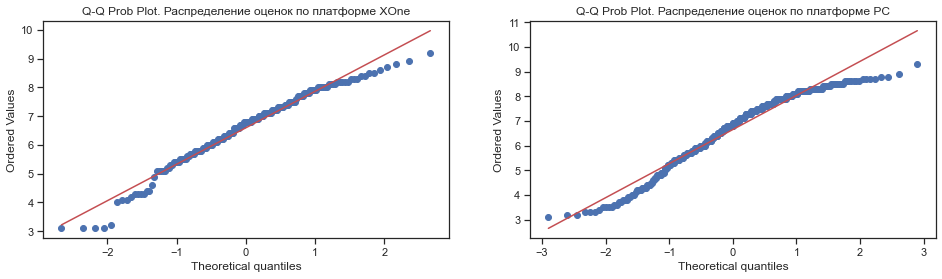

In [81]:
plt.figure(figsize=(16,4))
ax1 = plt.subplot(121)
# построим quantile-quantile plots методом probplot() из библиотеки stats для обеих выборок
st.probplot(games_xone, dist="norm", plot=plt)
ax1.set_title('Q-Q Prob Plot. Распределение оценок по платформе XOne')
ax2 = plt.subplot(122)
st.probplot(games_pc, dist="norm", plot=plt)
ax2.set_title('Q-Q Prob Plot. Распределение оценок по платформе PC')
plt.show()

- По графикам видно, что распределения выборок близки к нормальным.
- Проверим дополнительно равенство дисперсий выборок по критерию Левене.
- Нулевая и альтернативная гипотезы по критерию Левене:  
**H0**: Все k выборочных популяций имеют одинаковую дисперсию. (All of the k sample populations have equal variances.)   
**H1**: Хотя бы одна из k выборочных популяций имеет отличную от других дисперсию. (At least one of the k sample population variances are not equal.)  
Уровень значимости **alpha** примем **0.05**

In [82]:
# воспользуемся методом levene() из библиотеки stats
stat, p = st.levene(games_xone, games_pc)
print('Statistics = {:.3f}, p-value = {:.3f}'.format(stat, p))

Statistics = 3.921, p-value = 0.048


- p-value меньше чем alpha, следовательно, есть основания, что дисперсии выборках `games_xone` и `games_pc` немного различаются. Но критерий Стьюдента применим

In [83]:
# воспользуемся методом ttest_ind() из библиотеки stats
stat, p = st.ttest_ind(games_xone, games_pc, equal_var=False)   # считаем дисперсии выборок разными
print('Statistics = {:.3f}, p-value = {:.3f}'.format(stat, p))

Statistics = -0.485, p-value = 0.628


- `p-value` равен **0.63** > `alpha`. Исходя из этого, у нас нет оснований отвергать нулевую гипотезу. Эмпирически полученные данные не противоречат гипотезе H0:
- "Средняя пользовательская оценка игр на платформе Xbox One равна средней пользовательской оценке игр на платформе PC"

### 5.3 Средние пользовательские рейтинги жанров Action и Sports

- Проверим гипотезу:
    - "Средние пользовательские рейтинги жанров Action и Sports разные"
- Для начала сформулируем нулевую гипотезу H0:
    - "Средняя пользовательская оценка игр жанра Action равна средней пользовательской оценке игр жанра Sports"
- Сформулируем альтернативную гипотезу H1:
    - "Средняя пользовательская оценка игр жанра Action не равна средней пользовательской оценке игр жанра Sports"
- Определим уровень значимости `alpha = 0.05`
- Выборки оценок по жанрам `Action` и `Sports` не связаны друг с другом. Для расчёта статистики разности и `p-value` воспользуемся критерием Стьюдента `st.ttest_ind`

In [84]:
# сохраним в переменных games_action и games_sports срезы данных 
# по пользовательским оценкам игр жанров 'Action' и 'Sports' соответственно
games_action = games_actual.loc[(games_actual['genre'] == 'Action') &
                              (~games_actual['user_score'].isna()), 
                              'user_score']
games_sports = games_actual.loc[(games_actual['genre'] == 'Sports') &
                              (~games_actual['user_score'].isna()), 
                              'user_score']

- Для применения критерия Стьюдента выборки должны иметь нормальные распределения, а их дисперсии не должны сильно отличаться.
- Проверим нормальность распределений в выборках `games_action` и `games_sports` с помощью Q-Q plot.

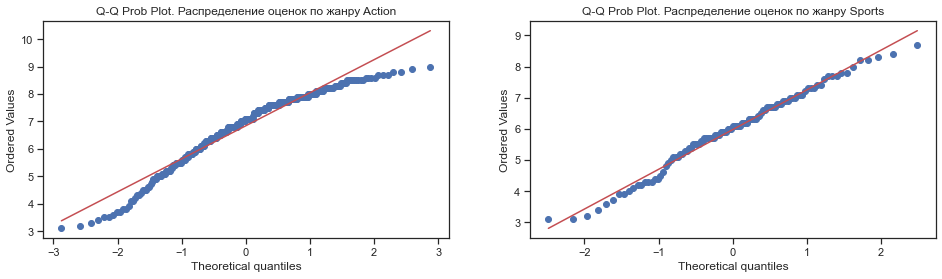

In [85]:
plt.figure(figsize=(16,4))
ax1 = plt.subplot(121)
# построим quantile-quantile plots методом probplot() из библиотеки stats для обеих выборок
st.probplot(games_action, dist="norm", plot=plt)
ax1.set_title('Q-Q Prob Plot. Распределение оценок по жанру Action')
ax2 = plt.subplot(122)
st.probplot(games_sports, dist="norm", plot=plt)
ax2.set_title('Q-Q Prob Plot. Распределение оценок по жанру Sports')
plt.show()

- По графикам видно, что распределения выборок близки к нормальным.
- Проверим дополнительно равенство дисперсий выборок по критерию Левене.
- Нулевая и альтернативная гипотезы по критерию Левене:  
**H0**: Все k выборочных популяций имеют одинаковую дисперсию. (All of the k sample populations have equal variances.)   
**H1**: Хотя бы одна из k выборочных популяций имеет отличную от других дисперсию. (At least one of the k sample population variances are not equal.)  
Уровень значимости **alpha** примем **0.05**

In [86]:
# воспользуемся методом levene() из библиотеки stats
stat, p = st.levene(games_action, games_sports)
print('Statistics = {:.3f}, p-value = {:.3f}'.format(stat, p))

Statistics = 0.105, p-value = 0.746


- p-value больше чем alpha, следовательно, нет оснований полагать, что дисперсии выборках `games_action` и `games_sports` различаются. 
- Можем воспользоваться критерием Стьюдента для проверки изначальной гипотезы.

In [87]:
# воспользуемся методом ttest_ind() из библиотеки stats
stat, p = st.ttest_ind(games_action, games_sports, equal_var=True)   # считаем дисперсии выборок идентичными
print('Statistics = {:.3f}, p-value = {:.3f}'.format(stat, p))

Statistics = 6.296, p-value = 0.000


- `p-value` практически равен 0 (гораздо меньше `alpha`). Исходя из этого, признаём нулевую гипотезу H0 мало вероятной. Эмпирически полученные данные позволяют отвергнуть нулевую гипотезу в пользу альтернативной H1:
- "Средняя пользовательская оценка игр жанра Action не равна средней пользовательской оценке игр жанра Sports"

### Выводы

- По первой гипотезе:   
Эмпирически полученные данные не противоречат гипотезе H0:
    - "Средняя пользовательская оценка игр на платформе Xbox One равна средней пользовательской оценке игр на платформе PC"  
    Изначальная гипотеза оказалась верна.
- По второй гипотезе:  
Эмпирически полученные данные позволяют отвергнуть нулевую гипотезу в пользу альтернативной H1:
    - "Средняя пользовательская оценка игр жанра Action не равна средней пользовательской оценке игр жанра Sports"  
    Изначальная гипотеза оказалась верна.

## Шаг 6. Общий вывод

**1)** Данные успешно загружены из файла. В таблице `games` 16715 записей. Дубликатов не обнаружено. Данные соответствуют описанию.  

**2)** Типы данных были преобразованы в соответствии с хранимой информацией.  
- Пропуски были исследованы и обработаны.
    - Доля пропусков в столбцах достигает 55%.
    - Возможные причины пропусков: отсутствие информации при сборе данных, или сбой в системе при выгрузке таблицы из базы данных
- Рассмотрены распределения числовых параметров. 
    - Данные по продажам сильно скошены вправо. Доля выбросов достигает 11.3%.  
    Большинство игр продаются по миру количеством до 1.09 миллионов копий. Однако есть ряд очень популярных игр, продающихся количеством до 82.5 миллионов копий. Они и вносят смещение в данные.
    - Данные по оценкам немного скошены влево. Доля выбросов достигает 4%.

**3)** 
- Проанализированы уровни глобальных продаж по различным игровым платформам. Выделены основные популярные платформы на 2016 год  **'PS4', '3DS', 'XOne', 'WiiU', 'PC'**.
- Выделен актуальный период для исследования игр **с 2010 по 2016 гг**.  
- Лидером по суммарным продажам является `PS4`. Однако медианные значения для `XOne` и `WiiU` выше чем у `PS4`. Такая разница обусловлена большим количеством выбросов (популярные игры с высокими продажами). Доля выбросов около **12%**.
- Между глобальными продажами и оценками критиков наблюдается небольшая корреляция **(0.34 - 0.42)** по всем игровым платформам. Для платформы `3DS` наблюдается небольшая корреляция **0.22** между этими параметрами. Для платформы `WiiU` корреляция ещё выше **(0.4)**. Пользователи игровой платформы `WiiU` перед покупкой очередной игры интересуются мнением других игроков (помимо оценок критиков).
- Рассмотрено влияние жанра игры на продажи.
    - Самым популярным и продаваемым жанром является Shooter (медианное значение **0.35 млн копий** по всем платформам).
    - Наименее продаваемыми являются жанры `Pazzle`, `Adventure`, `Strategy` (медианное значение **0.06 млн копий**)
    - По всем жанрам много выбросов. В каждом жанре есть популярные игры с уровнем продаж на порядки выше средних значений.

**4)** 
- Найдены ТОП5 платформ с максимальными долями продаж для Северной Америки, Европы и Японии.
    - Для Европы и Северной Америки предпочтения в игровых платформах схожи. В ТОП5 разные поколения `PS`, `Nintendo` (Wii) и `Xbox`. В Европе также предпочтение отдают играм на `PC`.  
    - В Японии же кроме `PS` популярны платформы серии `DS`. 
- Найдены ТОП5 жанров с максимальными долями продаж для Северной Америки, Европы и Японии.
    - Для Европы и Северной Америки данные практически не отличаются `Action`, `Shooter`, `Sports`, `Misc`, `Role-Playing`.
    - В Японии помимо `Role-Playing`, `Action` и `Misc` любят `Fighting` и `Adventure`. А `Shooter` и `Sports` покупают гораздо меньше.
- Проанализированы зависимости уровня продаж игр от рейтинга ESRB в каждом регионе. 
    - Для Европы и Северной Америки большинство игр покупают с рейтингом 'M' (17+) и 'Е' (без ограничений). Это может быть обусловлено запросом игроков на взрослый контент в играх (рейтинг 'М') и желанием компаний охватывать максимальное количество возрастных групп (игры категории 'E').
    - В Японии большую часть игр покупают для детей и подростков (категории 'E' и 'T').
- Различия в продажах между Японией  остальными регионами обуславливается менталитетом игроков и обособленностью Японского рынка. Многие игры создаются в японии для внутреннего рынка и для собственных платформ.


**5)** 
- По первой гипотезе:   
Эмпирически полученные данные не противоречат гипотезе H0:
    - "Средняя пользовательская оценка игр на платформе Xbox One равна средней пользовательской оценке игр на платформе PC"  
    Изначальная гипотеза оказалась верна.
- По второй гипотезе:  
Эмпирически полученные данные позволяют отвергнуть нулевую гипотезу в пользу альтернативной H1:
    - "Средняя пользовательская оценка игр жанра Action не равна средней пользовательской оценке игр жанра Sports"  
    Изначальная гипотеза оказалась верна.